## RAP MUSIC GENERATION

<u><b> Step 1 : Reading the rap song file </b> </u>

In [49]:
# read the rap text file with all the raps

rap_song_file = open(r'./All_Rap_lyrics.txt','r', encoding='utf-8').read()
rap_song_file = rap_song_file.lower() # converting all the text to lower case

<u><b>  Step 2 : Building bars from lyrics </b> </u>

#### Terminologies:
##### What is a bar in rap song:
- Usually one line of lyrics is one count, and there are 4 counts in a bar.  
- There are  16 bars in a verse in most rap songs.<br>

##### An example of bar using a lyrics below:
Lights slow motion, steppin' out the Phantom ===> 1 bar <br>
All eyes on me, peekin' and glancin' ===> 2nd bar <br>
Leanin' on the wall, with b-boys dancin' ===> 3rd bar <br>
Ears, neck, and wrists lookin' like the king's ransom ==> 4 bars <br>

###### Verse:
The combination of multiple bars is called Verse

In [50]:
# Since we need to read the lyrics bar by bar, then we will be splitting out rap songs collection line by line

bars = rap_song_file.split('\n') 

<b> <u> Step 3 : Cleaning the bars </b> </u> <br>
Cleaning the bars requires carrying out the following process:

- Converting characters to the lowercase characters
- Removing empty string i.e bar which are empty
- Removing special characters from the bars to contain only alphabets and spaces
- Removing characters inside [ ] as these are not relevant to the bars we are generating as they contain information regarding the lyrics when being sung. for example [head] ,[proof], [old school hip-hop beat tune plays in the background like a radio station]
- Stripping the end charcters (if its a space), this will make the end word not to end with space
- Removing the lines which has less than 3 words

In [51]:
print('Length of the bars : ', len(bars))

Length of the bars :  28983


In [52]:
# removing the charcacters inside [] and converting the bars to lowercase

import re
print('There are characters inside [ ], these are of no significance. For example : \n\n' , bars[85:90])
new_bars = []
for bar in bars:
    bar = re.sub(r'\[.*?\]', '', bar)
    bar = re.sub(r'\(.*?\)', '', bar)
    new_bars.append(bar.lower())
bars = new_bars


There are characters inside [ ], these are of no significance. For example : 

 ['', '', '', '[old school hip-hop beat tune plays in the background like a radio station]', '']


In [53]:
# We need to remove the empty_strings in bar

print(bars[80:90]) # we see that there are some empty strings in the file
bars = list(filter(None, bars)) ## filter out the strings with None

["but when i hear the beat i'm tempted to make another attempt at it...", "i'm infinite", '', "'95, '96 ", 'and on and on and on ', '', '', '', '', '']


In [54]:
bars[85:90] # empty string have been removed

['it goes by the name of eminem',
 'and it\'s called "it\'s ok"',
 ' check it out, ',
 ' hey kyu!',
 "it's a broke day but everything is ok "]

In [55]:
# Subsituting the special characters with empty space, stripping on the end of the strings

import re
new_bars = []
for bar in bars:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars = new_bars

In [56]:
bars[85:90]# special characters have been removed

['it goes by the name of eminem',
 'and its called its ok',
 'check it out',
 'hey kyu',
 'its a broke day but everything is ok']

In [57]:
# remove lines with less than 2 words

b = []
for pos, bar in enumerate(bars):
    count_words_bar = len(re.findall(r'\w+', bar)) 
    if count_words_bar < 4:
        del bars[pos]
    else:
        b.append(bar)
        continue
bars = b

In [58]:
with open('./cleaned_Rap.txt', 'w') as f:
    for item in bars:
        f.write("%s\n" % item)

In [59]:
print('Length of the bars : ', len(bars))

Length of the bars :  20007


<b> <u> Step 4 : Visualizing the dataset </b> </u>

In [60]:
# creating a word cloud of the most used words in a lyrics

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [61]:
# combining all the bars into a single string to feed into the wordcloud generate function

str_bars = ''
str_bars = ' '.join(bars)
wordcloud = WordCloud().generate(str_bars)

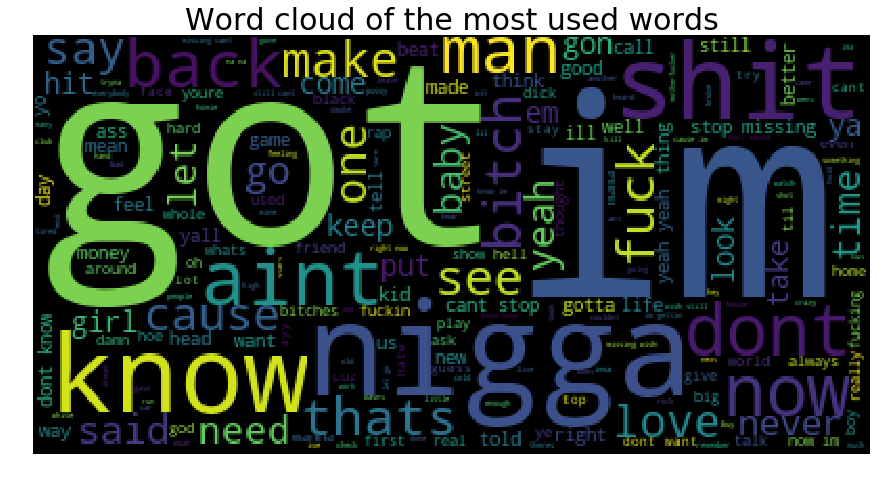

In [62]:
# forming the word cloud of the most used words in all the raps across

plt.figure(figsize=(15,100))
plt.title('Word cloud of the most used words', fontsize=30)
plt.imshow(wordcloud)
plt.axis("off") # added to not display the x and y axis
plt.show()

Text(0, 0.5, 'Number of songs')

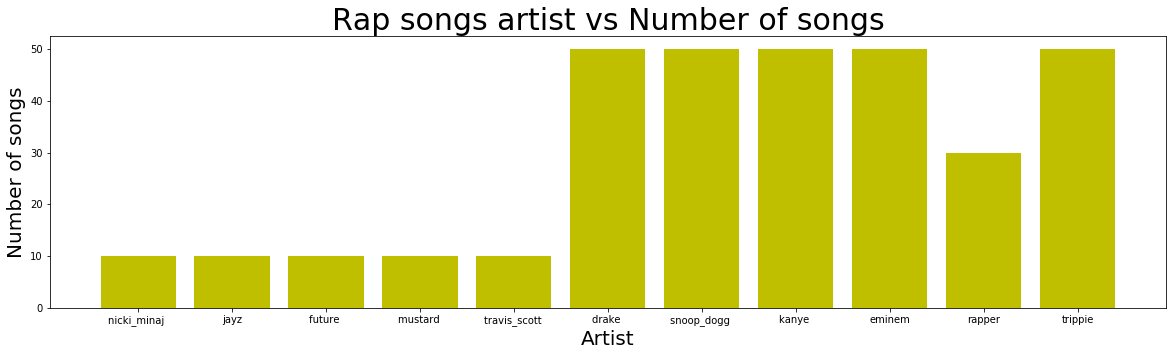

In [63]:
# visualizing artist and number of songs considered

import pandas as pd
df_artists = pd.read_excel(r'Rap_songs_artist.xlsx')

plt.figure(figsize=(20,5))
plt.title('Rap songs artist vs Number of songs', fontsize=30)
plt.bar(df_artists['Artist'],df_artists['Songs'], color= 'y')
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Number of songs', fontsize=20)

In [64]:
# counting the number and also count of unique words in the corpus

from nltk.tokenize import word_tokenize
words_count = word_tokenize(str_bars)

In [65]:
print('All the words in the bars : ' , len(words_count))
print('All the unique words in the bars : ' , len(set(words_count)))
print('The total number of bar : ', len(bars))

All the words in the bars :  169885
All the unique words in the bars :  11540
The total number of bar :  20007


<b> <u> Step 5 : Building the list of rhymes </b> </u>

In [66]:
import pronouncing #using this library to find the list of rhyming words

<b> Function : rhyming_list_all </b> <br>

- Since we are considering the rap with the rhyme scheme to rhyme the last word of a bar, firstly we take out the last word from every bar <br>
For example: for the last word rhyme lets consider these 2 bar:
            'to get your brain relaxing the zanyacting maniac in action',
            'a brainiac in fact son you mainly lack attraction'
<br>
- Then we are using a function pronouncing.rhymes(last_word). The function is used to find the the set of rhyming words with the last word.
<br> 
For example: pronouncing.rhymes('action') will give us the below output:
          ['abstraction', 'attraction', 'classaction', 'contraction', 'diffraction','dissatisfaction',                     'distraction', 'exaction', 'extraction', 'faction', 'fraction', 'inaction', 'infraction',                                       'interaction', 'interaction', 'liquefaction', 'reaction', 'retraction', 'satisfaction', 'satisfaction',                         'subtraction', 'telaction', 'traction', 'transaction']
<br>
- Then we consider the last 2 characters in every rhyming word which are as a result of pronouncing.rhymes(). As seen from the above example most of the words in the english dictionary rhyme when the last syllable in the word rhyme. The last syllable is mostly the set of last 2 or 3 charcters in the word. <br>
<br>
- We will create a dictionary of these 2 chracters and their corresponding count.
<br>
For example: The dictionary of the last 2 charcaters for the word 'action' is: {'on': 24}  <br>
<br>
- Then we will consider the most repeated 2 charcaters from the dictionary  <br>
<br>
- This will repeat for all the set of bar and find the last 2 characters and append it in the list

In [67]:
def rhyming_list_all(bars):
    rhyme_list_all = []
    rhyming_list_final = []
    for bar in bars:
        # taking the last word in each bar
        last_word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
        # finding the rhyming word for 'last_word'
        #print(last_word)
        rhyming_words = pronouncing.rhymes(last_word)
        #rhyming_words = [x.encode('UTF8') for x in rhyming_words]
        #print(rhyming_words)
        rhyming_words_ending = []
        for rhyming_word in rhyming_words:
            rhyming_words_ending.append(rhyming_word[-2:]) # this will pull the last 2 characters from each rhyming word
        #print(rhyming_words_ending)
        # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
        # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
        try:
            rhyming_words_ending_most_common = max(set(rhyming_words_ending), key = rhyming_words_ending.count)
        except Exception:
            rhyming_words_ending_most_common = last_word[-2:]
            #print(rhyming_words_ending_most_common)
        rhyme_list_all.append(rhyming_words_ending_most_common)
        #print(rhyme_list_all)
    # now taking the set of the list to get only unique last 2 characters
    #print('for loop ended')
    rhyme_list_all = list(set(rhyme_list_all))
    reverse_list = [x[::-1] for x in rhyme_list_all] #  using slicing syntax to reverse the letters[start,stop,step],
    #print(reverse_list)
    reverse_list = sorted(reverse_list)# sorting the characters
    #print(reverse_list)
    # now we will reverse the string again : this is done so that the words with the similar sounds can be taken in order
    rhyming_list_final =  [x[::-1] for x in reverse_list]
    return rhyming_list_final

In [68]:
rhyming_list_final = rhyming_list_all(bars) # contain the list of all common rhyming words (last 2 characters) used in the lyrics across all bars

In [69]:
print(len(rhyming_list_final)) # lenth of the common rhyming words used in the lyrics across all bars
print(rhyming_list_final)

286
["s'", 'a', 'ba', 'ca', 'da', 'ea', 'ga', 'ha', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'pa', 'ra', 'sa', 'ta', 'ua', 'va', 'ya', 'za', 'ab', 'eb', 'ib', 'ob', 'rb', 'ub', 'ac', 'bc', 'fc', 'gc', 'ic', 'mc', 'nc', 'oc', 'ad', 'ed', 'id', 'ld', 'nd', 'od', 'rd', 'ud', 'vd', 'be', 'ce', 'de', 'ee', 'fe', 'ge', 'he', 'ie', 'ke', 'le', 'me', 'ne', 'oe', 'pe', 're', 'se', 'te', 'ue', 've', 'ye', 'ze', 'af', 'ef', 'ff', 'if', 'lf', 'of', 'rf', 'tf', 'ag', 'bg', 'eg', 'gg', 'ig', 'ng', 'og', 'pg', 'rg', 'ug', 'wg', 'ah', 'ch', 'eh', 'gh', 'hh', 'ih', 'oh', 'ph', 'sh', 'th', 'uh', 'ai', 'ci', 'di', 'fi', 'gi', 'hi', 'ii', 'ki', 'li', 'mi', 'ni', 'oi', 'pi', 'ri', 'si', 'ti', 'zi', 'pj', 'tj', 'ak', 'ck', 'ek', 'ik', 'lk', 'nk', 'ok', 'rk', 'sk', 'al', 'el', 'hl', 'il', 'll', 'ol', 'rl', 'tl', 'ul', 'wl', 'xl', 'am', 'bm', 'em', 'hm', 'im', 'lm', 'mm', 'om', 'rm', 'sm', 'um', 'an', 'en', 'gn', 'in', 'mn', 'nn', 'on', 'rn', 'un', 'wn', 'yn', 'ao', 'bo', 'co', 'do', 'eo', 'fo', 'go', 'io', 'jo', 

<b> <u> Step 6 : We will count the syallables in a sentence  </b> </u>

### What is a syllables:
- A syllable is a single, unbroken sound of a spoken (or written) word. Syllables usually contain a vowel and accompanying consonants <br>  
- EXAMPLE: Water has two syllables (wa / ter), Computer has three syllables (com / pu / ter)<br>

### why do we need syllables in rap song?:
- Counting syllables is an excellent skill <br>
- Important part of the structure of your rhymes is syllable structure<br>
- The syllables in each line will create a beat in your rap<br>
- Generally, by drawing out a line with too many syllables, or making a line too short with too few syllables, you can disrupt the beat of your rap<br>
- Avoid this by trying to balance rhyming lines to have the same number of beats<br>

### To note: 
- We are considering the maximun number of syllables for out rap song to be the average number of syllables across each bar in bars

                    <b> Average syllables = [sum of syllables across each bar] / [total number of bar] </b>

In [70]:
import syllables
syllable_list_bar = []
def find_syllables_count(bar):
    syllable_list_bar.append(syllables.estimate(bar))
    estimate = syllables.estimate(bar)/12 # average syllables count in a bar
    estimate = round(estimate,3)
    return estimate

<b> <u>Step 7: we would convert the index of our rhyming 2 character into float value</b> </u>

- Now our aim is to give a score to list of the last 2 unique charactes list we formed earlier. This is done in order to give closer score to the words which end with the same syllable sound.

- To calculate the value for the index position, we are using the formula:
                [Index position of the 2 charcaters in the list] / [Total length of the list]


In [71]:

# we are doing the following steps to see that how close the rhyming words are each other
# This will make the last words which are similar in rhyme to get closer scores

def index_rhyming_word_to_float(rhyming_list_final, bar):
    word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
    rhymeslist = pronouncing.rhymes(word)
    #rhymeslist = [x.encode('UTF8') for x in rhymeslist]
    rhymeslistends = []
    for i in rhymeslist:
        rhymeslistends.append(i[-2:])
    try:
        rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
    except Exception:
        rhymescheme = word[-2:]
    #print(len(rhymescheme))
    try:
        float_rhyme = rhyming_list_final.index(rhymescheme)
        float_rhyme = float_rhyme / float(len(rhyming_list_final))
        float_rhyme = round(float_rhyme,3)
        #print(word, float_rhyme)
        return float_rhyme
    except Exception:
        #print(word, float_rhyme)
        return None

<b> <u>Step 8 : combining the list of bars, syllables and float_rhyme_bar_list to a list</b> </u>

- The step is carried out to assign every bar with 2 values:
                            1. average syllable count
                            2. Float value of the index position
- For example:  
                ['to get your brain relaxing the zanyacting maniac in action',0.8, 0.5294117647058824],
                ['a brainiac in fact son you mainly lack attraction', 0.65,0.5294117647058824]

In [72]:
print(len(syllable_list_bar))
average = sum(syllable_list_bar)/(len(syllable_list_bar))
print('Average syllables per bar', average)

0


ZeroDivisionError: division by zero

In [73]:
data_set = []
values_data_set = []
for bar in bars:
    values_data_set = [bar, find_syllables_count(bar), index_rhyming_word_to_float(rhyming_list_final, bar)]
    data_set.append(values_data_set)

### What is a verse:
- Writing arranged with a metrical rhythm, typically having a rhyme <br>

### why do we need verse in rap song?:
- Verses are an important componenent of any song <br>
- The duration is usually 16 bars, but the verse may last 8 bars, 12 bars, or 24 bars.<br>
- As seen from the above patten, we will consider a verse of length 4<br>


 <b> <u> Step 9 : creating the X and y for the lstm model </b> </u>

- The following step is executed to create the dataset with features and labels
- we are looping over all the bar in bars and creating the dataset in the following pattern:
                        Combination 1 and Combination 2 ==> Features
                        Combination 3 and Combination 4 ==> Labels
- The process is being done so that the we can prepare a data set where every 2 bar is predicting the next 2 bars in the lyrics

In [165]:
import numpy as np
X = []
y = []
i = 0
for data in range(len(data_set) - 3):
    
    # this would create feature and labels as follows:
    # for example: if features ==> line 1, line 2, then labels ==> line 3, line 4
    # if features ==>  line 2, line 3, then labels ==> line4, line 5
    
    bar_1 = data_set[data][1:]
    bar_2 = data_set[data + 1][1:]
    bar_3 = data_set[data + 2][1:]
    bar_4 = data_set[data + 3][1:]       

    feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1]]
    label = [bar_3[0], bar_3[1], bar_4[0], bar_4[1]]

    feature = np.array(feature)
    label = np.array(label)
   
    feature = feature.reshape(2,2)
    label = label.reshape(2,2)
 
    X.append(feature)
    y.append(label)
X = np.array(X)
y = np.array(y)

- As seen below, the X and Y are numpy arrays, where each X and y has a shape (total number of elements, 2,2)

In [166]:
print('X ====>  \n', X[:2])
print('\ny ====> \n', y[:2])

X ====>  
 [[[1.333 0.178]
  [0.417 0.276]]

 [[1.083 0.531]
  [1.333 0.538]]]

y ====> 
 [[[0.667 0.759]
  [1.333 0.531]]

 [[0.75  0.738]
  [1.333 0.738]]]


 <b> <u> Step 10 : LSTM Model </b> </u>

- We are using the LSTM model for training and validation
- The lSTM model would learn to find the rhyming pattern in the text which we will feed in the form of X and y

In [167]:
# step 9 : creating the lstm model for training
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from tensorflow.python.keras.callbacks import TensorBoard

In [168]:
from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [169]:
import keras
import os
import tensorflow
import datetime
model = Sequential()
model.add(LSTM(2, input_shape = (2,2), return_sequences = True)) # input shape has time steps is 2 and number of features we have is also 2
model.add(LSTM(4, return_sequences = True)) # taking 3 layers with 4 nodes each
model.add(LSTM(4, return_sequences = True)) 
model.add(LSTM(4, return_sequences = True))
model.add(LSTM(2, return_sequences = True))
model.summary()

sgd = keras.optimizers.SGD(lr=0.01) # have defined the learning rate as 0.01, so that model can converge faster(it also has disadvantages)

model.compile(optimizer = sgd , loss = 'mse', metrics=[rmse]) # the optimizer function 'Stochastic gradient descent': optimizes the gradient descent and the the loss function: mse: "mean_squared_error  as its a regression problem

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 2, 2)              40        
_________________________________________________________________
lstm_52 (LSTM)               (None, 2, 4)              112       
_________________________________________________________________
lstm_53 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_54 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_55 (LSTM)               (None, 2, 2)              56        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [170]:
# we tried alot of possible combinations of model paramters but these were the best set of parameters for LSTM as seen from the graph of loss and Root mean squared error

In [171]:
# fitting the model
history_train_with_train = model.fit(np.array(X), np.array(y),epochs = 60,verbose = 1,batch_size= 100, validation_split=0.30,callbacks=[tensorflow.keras.callbacks.TensorBoard('logs')])

Train on 3500 samples, validate on 1501 samples
Epoch 1/60
3500/3500 [==============================] - 9s 3ms/step - loss: 0.6451 - rmse: 0.7780 - val_loss: 0.5488 - val_rmse: 0.7120
Epoch 2/60
3500/3500 [==============================] - 0s 99us/step - loss: 0.6026 - rmse: 0.7501 - val_loss: 0.5117 - val_rmse: 0.6853
Epoch 3/60
3500/3500 [==============================] - 0s 99us/step - loss: 0.5653 - rmse: 0.7249 - val_loss: 0.4797 - val_rmse: 0.6615
Epoch 4/60
3500/3500 [==============================] - 0s 103us/step - loss: 0.5333 - rmse: 0.7024 - val_loss: 0.4525 - val_rmse: 0.6404
Epoch 5/60
3500/3500 [==============================] - 0s 100us/step - loss: 0.5061 - rmse: 0.6826 - val_loss: 0.4294 - val_rmse: 0.6220
Epoch 6/60
3500/3500 [==============================] - 0s 102us/step - loss: 0.4829 - rmse: 0.6654 - val_loss: 0.4097 - val_rmse: 0.6059
Epoch 7/60
3500/3500 [==============================] - 0s 108us/step - loss: 0.4631 - rmse: 0.6502 - val_loss: 0.3928 - val_rms

3500/3500 [==============================] - 0s 110us/step - loss: 0.1908 - rmse: 0.3978 - val_loss: 0.1597 - val_rmse: 0.3548
Epoch 60/60
3500/3500 [==============================] - 0s 112us/step - loss: 0.1885 - rmse: 0.3953 - val_loss: 0.1579 - val_rmse: 0.3526


In [ ]:
# We can visualize in tensor board the flow of the model
# Load TENSORBOARD
%load_ext tensorboard.notebook
# Start TENSORBOARD
%tensorboard --logdir logs
%reload_ext tensorboard.notebook


##### The percentage of error across train and validation
- Train : 23.64 %
- Validation : 23.44 %

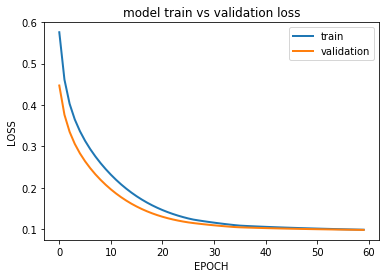

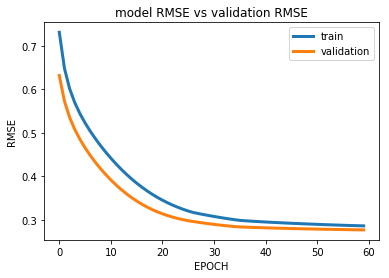

In [151]:
# summarize history for loss
import matplotlib.pyplot as plt

plt.plot(history_train_with_train.history['loss'][:],linewidth=2)
plt.plot(history_train_with_train.history['val_loss'][:],linewidth=2)

plt.title('model train vs validation loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history_train_with_train.history['rmse'],linewidth=3)
plt.plot(history_train_with_train.history['val_rmse'],linewidth=3)
plt.title('model RMSE vs validation RMSE')
plt.ylabel('RMSE')
plt.xlabel('EPOCH')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.show()

<b> <u> Step 11 : Creating new senetences using Markov chain </b> </u>
- The step is carried out to create new sentences which could be the part of the new lyrics

In [106]:
# step 10 : now we will generate new lyrics using markov chain by creating a markov_text object, which would be used to make sentences later
import markovify
markov_text = markovify.NewlineText(rap_song_file)

In [107]:
def get_last_word(bar):
    last_word = bar.split(" ")[-1]
    # if the last word is punctuation, get the word before it
    if last_word[-1] in "!.?,":
        last_word = last_word[:-1]
    return last_word

In [108]:
def generate_lyrics():
    bars_new_lyrics = []
    last_words = []
    lyriclength = len(bars)
    count = 0
    #markov_model = markov_text((". ").join('songs.txt') + ".")

    while len(bars_new_lyrics) < lyriclength / 9 and count < lyriclength * 2:
        # By default, the make_sentence method tries, a maximum of 10 times per invocation,
        # to make a sentence that doesn't overlap too much with the original text.
        # If it is successful, the method returns the sentence as a string.
        # If not, it returns None. (https://github.com/jsvine/markovify)
        bar = markov_text.make_sentence()
        #print(bar)
        # make sure the bar isn't 'None' and that the amount of
        # syllables is under the max syllables
        if type(bar) != type(None) and find_syllables_count(bar) < 1:

            # function to get the last word of the bar
            def get_last_word(bar):
                last_word = bar.split(" ")[-1]
                # if the last word is punctuation, get the word before it
                if last_word[-1] in "!.?,":
                    last_word = last_word[:-1]
                return last_word

            last_word = get_last_word(bar)
            # only use the bar if it is unique and the last_word
            # has only been seen less than 3 times
            if bar not in bars_new_lyrics and last_words.count(last_word) < 3:
                bars_new_lyrics.append(bar)
                last_words.append(last_word)
                count += 1

    return bars_new_lyrics

In [109]:
bars_new_lyrics = generate_lyrics()

In [110]:
# using this method to clear any special characters from the newly generated sentences 
new_bars = []
for bar in bars_new_lyrics:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars_new_lyrics = new_bars

In [143]:
bars_new_lyrics[0:10] # sample of some sentence created using markov chain

['when they sell clothes',
 'i dont want it all looks great',
 'from principal to the kitchen',
 'i sell a watch and just circle the mall up',
 'and they ship it like a happy meal',
 'don corleone the big screen',
 'the industry and made him real real mad',
 'now she back that thing in the car',
 'but this is what she wrote',
 'i just dont get to get you outta my mind']

In [112]:
print('Length of the newly generated bar using markov chain : ' , len(bars_new_lyrics))

Length of the newly generated bar using markov chain :  2223


In [113]:
# repeating the same process to find the list of rhyming characters and creating a list
rhyming_list_final_new_lyrics = rhyming_list_all(bars_new_lyrics)

In [114]:
rhyming_list_final_new_lyrics[:10] # some of the rhyming characters

["s'", 'a', 'ca', 'da', 'ga', 'ia', 'ka', 'la', 'ma', 'na']

In [115]:
print(len(rhyming_list_final_new_lyrics))

200


<b> <u> Step 12 : Making prediction for the next lines to be considered for generating new rap songs </b> </u>
- The step is carried out to select any random index to start from the original lyrics
- Then selecting the next line to the randonly selected index
- Passing these inputs in the model and getting the prediction
- Using the prediction and passing it to the model to get new prediction
- This process is repeated to the length of the lyrics we want to achieve

In [172]:
import random
def predicting_lyrics(lines, rhyming_list_final_new_lyrics, model):
    rap_vectors = []
    human_lyrics = bars
    
    # random index to start
    initial_index = random.choice(range(len(bars) - 1))
    # choosing the next 2 lines corresponding to the index
    initial_lines = bars[initial_index:initial_index + 2]

    starting_input = []
    for line in initial_lines:
        starting_input.append([find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final_new_lyrics,line)])
        #print(starting_input)
    starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(1, 2, 2))
    rap_vectors.append(starting_vectors)
    for i in range(50):
        
        rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(1, 2, 2)))
    return rap_vectors

In [173]:
rap_generated_with_prediction = predicting_lyrics(bars_new_lyrics, rhyming_list_final_new_lyrics, model)

<b> <u> Step 12 : Making prediction for the next lines to be considered for generating new rap songs </b> </u>
- The step is carried out to assign every new lyrics bar with 2 values:
                            1. average syllable count
                            2. Float value of the index position
- For example:  
                ['to get your brain relaxing the zanyacting maniac in action',0.8, 0.5294117647058824],
                ['a brainiac in fact son you mainly lack attraction', 0.65,0.5294117647058824]

In [119]:
dataset_new_lyrics = []
for line in bars_new_lyrics:
    line_list = [line, find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final_new_lyrics,line)]
    dataset_new_lyrics.append(line_list)

In [144]:
# compare the last words to see if they are the same, if they are
# increment a penalty variable which grants penalty points for being
# uncreative
def comparing_last_words_bars(rap, line2):
    additional_penalising = 0
    for line1 in rap:
        word1 = line1.split(" ")[-1]
        word2 = line2.split(" ")[-1]
        if word1 == word2:
            additional_penalising += 1

    return additional_penalising

# vector_half is a single [syllable, rhyme_index] pair
# returns a score rating for a given line
def calculate_score(vector_half, syllables, rhyme, penalty):
    desired_syllables = vector_half[0]
    desired_rhyme = vector_half[1]
    # desired_syllables is the number of syllables we want
    desired_syllables = desired_syllables * 11
    # desired rhyme is the index of the rhyme we want
    desired_rhyme = desired_rhyme * len(rhyming_list_final_new_lyrics)

    # generate a score by subtracting from 1 the sum of the difference between
    # predicted syllables and generated syllables and the difference between
    # the predicted rhyme and generated rhyme and then subtract the penalty
    score = 1.0 - (abs((float(desired_syllables) - float(syllables))) + abs(
        (float(desired_rhyme) - float(rhyme)))) - penalty

    return score


In [145]:
def song_generation(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics):
     # generated a list of all the lines from generated_lyrics with their
    # line, syllables, and rhyme float value
    rap = []
    rap_bars = []
    for raps in rap_generated_with_prediction:
        # vectors are the 2x2 rap_vectors (predicted bars) generated by compose_rap()
        # separate every vector into a half (essentially one bar) where each
        # has a pair of [syllables, rhyme_index]
        rap_bars.append(list(raps[0][0]))
        rap_bars.append(list(raps[0][1]))
    #print(rap_bars) # predictions are subdivided into an array of [syllable and rhyming index pair]
    for rap_bar in rap_bars:
        # Each vector (predicted bars) is scored against every generated bar ('item' below)
        # to find the generated bar that best matches (highest score) the vector predicted
        # by the model. This bar is then added to the final rap and also removed from the
        # generated lyrics (dataset) so that we don't get duplicate lines in the final rap.
        scorelist = []
        for item in dataset_new_lyrics[:]:
            # item is one of the generated bars from the Markov model
            line = item[0]
            #print('len(rap)', rap)
            if len(rap) != 0:
                penalty = comparing_last_words_bars(rap, line)
            else:
                penalty = 0
            # calculate the score of the current line
            total_score = calculate_score(rap_bar, item[1], item[2], penalty)
            score_entry = [line, total_score]
            # add the score of the current line to a scorelist
            scorelist.append(score_entry)

        fixed_score_list = []
        for score in scorelist:
            fixed_score_list.append(float(score[1]))
        # get the line with the max valued score from the fixed_score_list
        max_score = max(fixed_score_list)
        for item in scorelist:
            if item[1] == max_score:
                # append item[0] (the line) to the rap
                rap.append(item[0])
                #print(str(item[0]))

                # remove the line we added to the rap so
                # it doesn't get chosen again
                for i in dataset_new_lyrics:
                    if item[0] == i[0]:
                        dataset_new_lyrics.remove(i)
                        break
                break
    return rap


In [146]:
rap_song_generated = song_generation(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics)

In [147]:
rap_song_generated

['i got my money so naturally',
 'yeah man this is pure luxury',
 'but their spirits still live at your crew',
 'closer i get my fucking lines out',
 'if i had respect for is wiz',
 'niggas dont wanna get witht his',
 'look hey we gotta eat some way',
 'unless a nigga gotta floss hey',
 'if what you about cause i stay',
 'you used to have a good day',
 'heres a brighter bulb for your dumb shit',
 'because black is the third ayy',
 'contrast to all the concerts so owww',
 'been a bad bitch im picture perfect',
 'so she just slept with me shawty',
 'i hate when i drop this solo',
 'and talk all through the rhyming boy',
 'second class bitches wouldnt let you go',
 'and these hoes like tennis rackets',
 'cause this is family business',
 'but all you have just kissed his ass',
 'cause it take to be you yo no s',
 'wanging my shit was my body',
 'you only get the grade you want',
 'but you can suck his fucking agent',
 'show up right where we flying they cant',
 'i just wanna make a priest 

In [ ]:
rap_song_generated_string = '\n'.join([i for i in rap_song_generated[:]])

In [ ]:
print(rap_song_generated_string)